In [17]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pylab

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['hi_measurements', 'stations']

In [8]:
# Save references to each table
Measurement = Base.classes.hi_measurements
Station = Base.classes.stations

In [9]:
print(Measurement)

<class 'sqlalchemy.ext.automap.hi_measurements'>


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


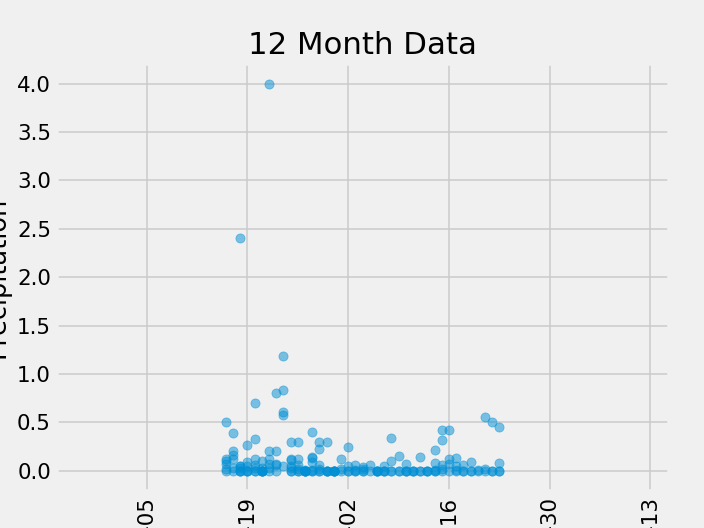

(array([736515., 736529., 736543., 736557., 736571., 736585.]),
 <a list of 6 Text xticklabel objects>)

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#twelve_month_precip = session.query(Measurement).all()
# Calculate the date 1 year ago from today

N = 365

date_365_days_ago = datetime.now() - timedelta(days=N)
year_ago_date = date_365_days_ago.date()
#print datetime.now()
#print(year_ago_date)

# Perform a query to retrieve the data and precipitation scores
precip_past_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>date_365_days_ago)


# Save the query results as a Pandas DataFrame and set the index to the date column
precipastyeardf=precip_past_year.all()
prcip_df = pd.DataFrame(precipastyeardf)
prcip_df.set_index("date", inplace = True)

# Sort the dataframe by date
prcip_df.sort_values("date")
# Use Pandas Plotting with Matplotlib to plot the data
y_pos = np.arange(len(prcip_df))
plt.scatter(prcip_df.index, prcip_df["prcp"], alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("12 Month Data")
plt.show()

# Rotate the xticks for the dates
plt.xticks(rotation='vertical')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcip_df.describe()


,prcp
count,178
unique,41
top,0.00
freq,84


In [35]:
# How many stations are available in this dataset?
session.query(Station).count()


9

In [72]:
# What are the most active stations?
Active_stations=session.query(Measurement.station,func.count(Measurement.tobs)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all()


# List the stations and the counts in descending order.
#df = pd.DataFrame(Active_stations)
dataframe_output = pd.DataFrame(Active_stations, columns=['Station', 'Observations'])
dataframe_output.set_index("Station", inplace = True)
print (dataframe_output)



             Observations
Station                  
USC00519281          2772
USC00513117          2696
USC00519397          2685
USC00519523          2572
USC00516128          2484
USC00514830          1937
USC00511918          1932
USC00517948           683
USC00518838           342


In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
lowest_temp = session.query(Measurement.station,Measurement.tobs).order_by(Measurement.tobs.asc()).limit(1).all()
# highest temperature recorded, and average temperature most active station?

highest_temp = session.query(Measurement.station,Measurement.tobs).order_by(Measurement.tobs.desc()).limit(1).all()

avg_temp = session.query(Measurement.station,func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
print(f"Station and Lowest Temp: {lowest_temp}")
print(f"Station and Highest Temp: {highest_temp}")
print(f"Most active Station and Avg Temp: {avg_temp}")

Station and Lowest Temp: [('USC00511918', 53)]
Station and Highest Temp: [('USC00519397', 87)]
Most active Station and Avg Temp: [('USC00519281', 71.66378066378067)]


<IPython.core.display.Javascript object>


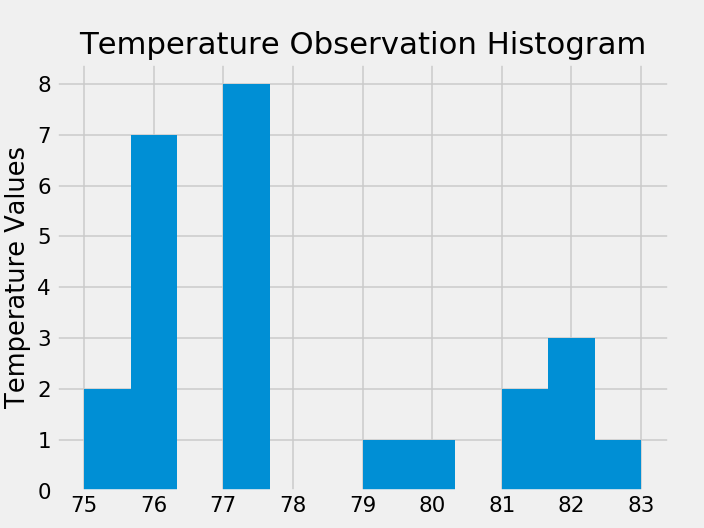

In [84]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_qry = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date>date_365_days_ago).\
    filter(Measurement.station == "USC00519281").all()

histogram_df = pd.DataFrame(histogram_qry, columns=['date', 'tobs'])
histogram_df.hist(column='tobs', bins=12)
plt.ylabel('Occurances')
plt.ylabel('Temperature Values')
plt.title('Temperature Observation Histogram')
plt.grid(True)

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


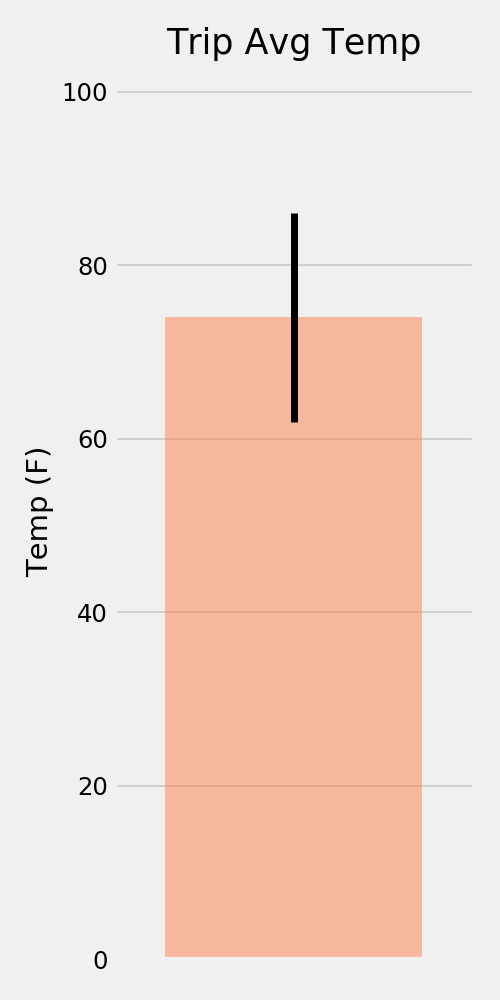

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


In [30]:

date_prcpdate_pr  = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23")

<IPython.core.display.Javascript object>


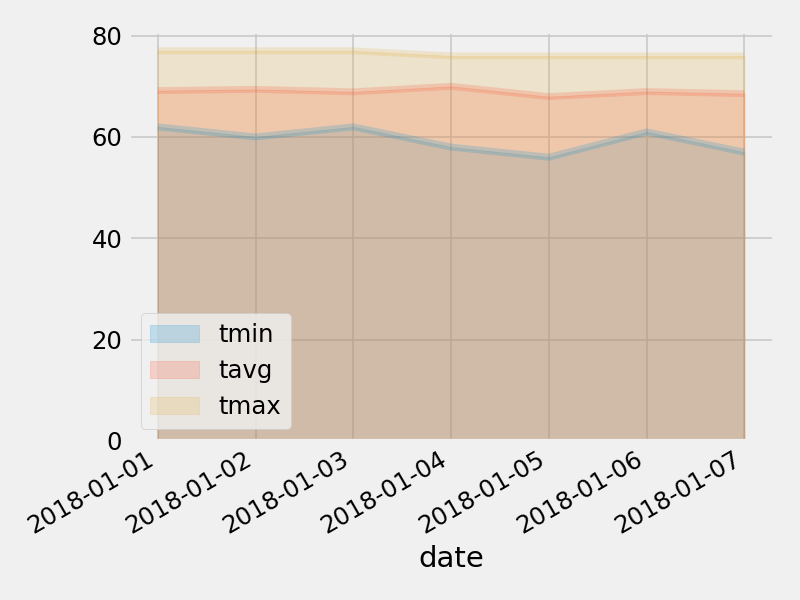

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
